In [233]:
## IMPORTAR LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio
from matplotlib.patches import Patch 

In [235]:
# Cargar las dos capas vectoriales (Suelos y capacidad de uso)
gdf_suelos = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/LA UNION/LA_UNION_SUELOS_.gpkg') #Capa 1
gdf_capacidad = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/LA UNION/LA_UNION_CAPACIDAD.gpkg') #Capa 2
gdf_IDEAM = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/LA UNION/LA_UNION_IDEAM.gpkg') #Capa 3


In [257]:
# Realizar la intersección entre las dos capas
gdf_intersection = gpd.overlay(gdf_capacidad, gdf_IDEAM, how='intersection')

# Ver el resultado de la intersección
print(gdf_intersection)


     UCS_CP CLASE SUBCLASE GRUPO_MANE  \
0        CA    CA       CA         CA   
1        CA    CA       CA         CA   
2        CA    CA       CA         CA   
3        CA    CA       CA         CA   
4        CA    CA       CA         CA   
..      ...   ...      ...        ...   
282  IIsc-1    II       sc          1   
283   VIs-1    VI        s          1   
284  VIpe-1    VI       pe          1   
285  VIpe-1    VI       pe          1   
286  VIpe-1    VI       pe          1   

                                                   UCS  \
0                                                   CA   
1                                                   CA   
2                                                   CA   
3                                                   CA   
4                                                   CA   
..                                                 ...   
282                  AMa, AMb, CKa, LBa, RLa, (LB-RL)a   
283  BUar, LVar, TTar, (GY-LV)ar, (LM-EV)ar

<Axes: >

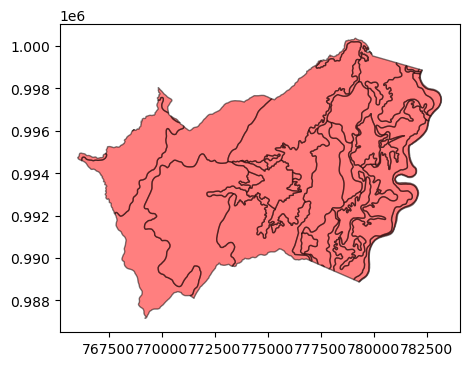

In [291]:
# Crear el mapa 1 Capacidad
fig, ax = plt.subplots(figsize=(10, 4))
gdf_capacidad.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Capacidad')

<Axes: >

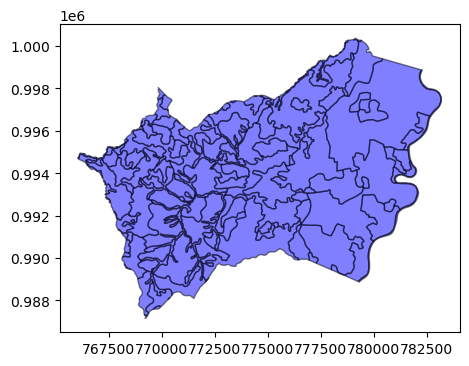

In [293]:
# Crear el mapa 2 IDEAM
fig, ax = plt.subplots(figsize=(10, 4))
gdf_IDEAM.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', label='IDEAM')

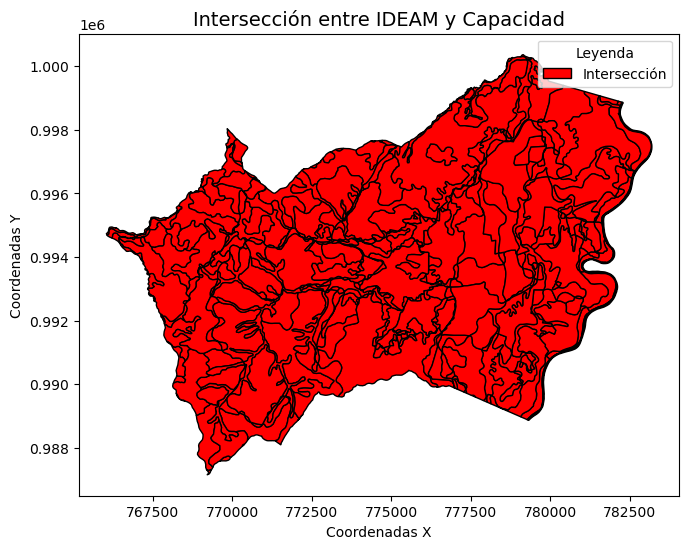

In [295]:
# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar la intersección
gdf_intersection.plot(ax=ax, color='red', edgecolor='black', label='Intersección')

# Personalizar mapa
ax.set_title('Intersección entre IDEAM y Capacidad', fontsize=14)
ax.set_xlabel('Coordenadas X')
ax.set_ylabel('Coordenadas Y')

# Crear leyenda 
legend_elements = [Patch(facecolor='red', edgecolor='black', label='Intersección')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10, title='Leyenda')

# Mostrar el mapa
plt.show()


In [297]:
# Realizar la operación de diferencia
gdf_difference = gpd.overlay(gdf_capacidad, gdf_suelos, how='difference')

# Guardar resultado como shape
gdf_difference.to_file('OUTSIDE.shp')

# Print resultado
print(gdf_difference)

      UCS_CP CLASE SUBCLASE GRUPO_MANE  \
0         CA    CA       CA         CA   
1     VIes-1    VI       es          1   
2     IIIs-3   III        s          3   
3    VIIp-14   VII        p         14   
4   VIIpe-16   VII       pe         16   
5    VIps-16    VI       ps         16   
6     IVh-14    IV        h         14   
7     VIes-1    VI       es          1   
8     VIes-1    VI       es          1   
9     VIes-1    VI       es          1   
10   IIIhs-1   III       hs          1   
11  VIIpe-16   VII       pe         16   
12     VIs-3    VI        s          3   
13        ZU    ZU       ZU         ZU   
14     VIs-1    VI        s          1   
15    VIpe-1    VI       pe          1   

                                                  UCS  \
0                                                  CA   
1                                          SJb2, SJc2   
2   ADar, ARa, ARb, AYar, BNa, CUa, GRa, LEar, RTa...   
3   PQAf, PQAf1, PQAf2, PQBf2, PQIf2, MQAf1, MQAf2...   


C:\Users\mario.celis\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 827082549.18599999 of field SHAPE_Area of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(


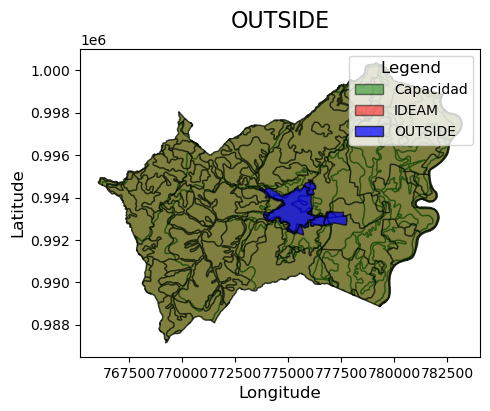

In [301]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  # Importa Patch para la leyenda personalizada

# Crear mapa
fig, ax = plt.subplots(figsize=(12, 4))

# Dibujar capas
gdf_capacidad.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='capacidad')
gdf_IDEAM.plot(ax=ax, color='green', alpha=0.5, edgecolor='black', label='IDEAM')
gdf_difference.plot(ax=ax, color='blue', alpha=0.7, edgecolor='black', label='OUTSIDE')

# Configurar título y ejes
ax.set_title('OUTSIDE', fontsize=16, pad=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Crear leyenda 
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Capacidad'),
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='IDEAM'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.7, label='OUTSIDE'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10, title='Legend', title_fontsize=12)

# Mostrar el mapa
plt.show()

